##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Convolutional Neural Network (CNN)

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/cnn">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/cnn.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). Because this tutorial uses the [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), creating and training your model will take just a few lines of code.


### Import TensorFlow

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

from PIL import Image
import os

import numpy as np

2022-11-30 23:22:03.319370: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-30 23:22:03.365402: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images.shape

test_images.shape

train_labels.shape


(50000, 1)

In [4]:
# Python program to convert numpy array to image

# import required libraries
import numpy as np
from PIL import Image as im

# define a main function
def main():

    # create a numpy array from scratch
    # using arange function.
    # 1024x720 = 737280 is the amount 
    # of pixels.
    # np.uint8 is a data type containing
    # numbers ranging from 0 to 255 
    # and no non-negative integers
    array = np.arange(0, 737280, 1, np.uint8)

    # check type of array
    print(type(array))

    # our array will be of width 
    # 737280 pixels That means it 
    # will be a long dark line
    print(array.shape)

    # Reshape the array into a 
    # familiar resoluition
    array = np.reshape(array, (1024, 720))

    # show the shape of the array
    print(array.shape)

    # show the array
    print(array)

    # creating image object of
    # above array
    data = im.fromarray(array)

    # saving the final output 
    # as a PNG file
    # data.save('gfg_dummy_pic.png')
    
    # data

# driver code
if __name__ == "__main__":

    # function call
    main()

<class 'numpy.ndarray'>
(737280,)
(1024, 720)
[[  0   1   2 ... 205 206 207]
 [208 209 210 ... 157 158 159]
 [160 161 162 ... 109 110 111]
 ...
 [144 145 146 ...  93  94  95]
 [ 96  97  98 ...  45  46  47]
 [ 48  49  50 ... 253 254 255]]


In [5]:
# Test creating image from array

a = np.full((100, 100), 0)
im = Image.fromarray(a, mode="L")
im.getpixel((0, 0))  # 44
im = Image.fromarray(a, mode="RGB")
im.getpixel((0, 0))  # (44, 1, 0)



(0, 0, 0)

In [6]:
# train_images[0,:,:,:].shape

# train_images[0,:,:,:]

# Image.fromarray(train_images[0,:,:,:])

In [7]:
# Load single image to test converting to array

# load image
img = Image.open('Training Set BW/01_k-0p082.jpg')

# asarray() class is used to convert PIL images into NumPy arrays
numpydata = np.asarray(img)

# <class 'numpy.ndarray'>
print(type(numpydata))

# shape
print(numpydata.shape)


<class 'numpy.ndarray'>
(480, 640, 3)


In [8]:
# Load images into arrays and create labels

filenames = []

all_distortion_images = np.zeros((1,480,640,3)) # array of RGB values for images [N x width x height x 3]

all_distortion_labels = np.zeros(1,dtype=int) # array of labels for images denoting if they are distorted. 0 = not distorted, 1 = distored

# directory
directory = 'Training Set BW'

# iterate over files in directory
for filename1 in os.listdir(directory):
    f1 = os.path.join(directory, filename1)
    # check if file is valid
    if os.path.isfile(f1) and ".jpg" in f1:
        filenames.append(filename1)
        # load image
        img = Image.open(f1)
        # convert to numpy array
        img_array = np.asarray(img)/255
        # print(img_array.shape)
        # if numpy array is 480 x 640 x 3, then append to all_images array
        if img_array.shape[0] == 480 and img_array.shape[1] == 640 and img_array.shape[2] == 3:
            img_array = img_array.reshape((1,img_array.shape[0],img_array.shape[1],img_array.shape[2])) # reshape to 1 x 480 x 640 x 3
            # print(img_array.shape)
            all_distortion_images = np.append(all_distortion_images, img_array, axis=0) # append to all_distortion_images array
        # if numpy array is 960 x 1280 x 3, then downsample by factor of 2, and append to all_images array
        if img_array.shape[0] == 960 and img_array.shape[1] == 1280 and img_array.shape[2] == 3:
            img_array = img_array[0:-1:2,0:-1:2,:] # downsample
            img_array = img_array.reshape((1,img_array.shape[0],img_array.shape[1],img_array.shape[2])) # reshape to 1 x 480 x 640 x 3
            # print(img_array.shape)
            all_distortion_images = np.append(all_distortion_images, img_array, axis=0) # append to all_distortion_images array
        # label images based on if "k" is in filename
        if "k" in filename1:
            all_distortion_labels = np.append(all_distortion_labels, 1)
        else:
            all_distortion_labels = np.append(all_distortion_labels, 0)

# remove first index of all_distortion_images and all_distortion_labels
all_distortion_images = all_distortion_images[1:,:,:,:]
all_distortion_labels = all_distortion_labels[1:]
all_distortion_labels = all_distortion_labels.reshape(-1,1)

all_distortion_images.shape

all_distortion_labels.shape



(50, 1)

In [9]:
# split data into train and test data

np.random.seed(42) # set random seed

idx = np.random.permutation(all_distortion_images.shape[0]) # get permutation 

idx_train = idx[0:40] # training indices
idx_test = idx[40:] # test indices

# print(idx_train)
# print(idx_test)

# split all data and labels into training and test sets
train_images = all_distortion_images[idx_train,:,:,:]

test_images = all_distortion_images[idx_test,:,:,:]

train_labels = all_distortion_labels[idx_train]

test_labels = all_distortion_labels[idx_test]

train_filenames = [filenames[idx_train[k1]] for k1 in range(0,len(idx_train))]
test_filenames = [filenames[idx_test[k1]] for k1 in range(0,len(idx_test))]

train_filenames = [filenames[idx] for idx in idx_train]
test_filenames = [filenames[idx] for idx in idx_test]

# print(train_labels[:,0].T)
# print(test_labels[:,0].T)



### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


In [10]:
# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
#                'dog', 'frog', 'horse', 'ship', 'truck']

# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[i])
#     # The CIFAR labels happen to be arrays, 
#     # which is why you need the extra index
#     plt.xlabel(class_names[train_labels[i][0]])
# plt.show()

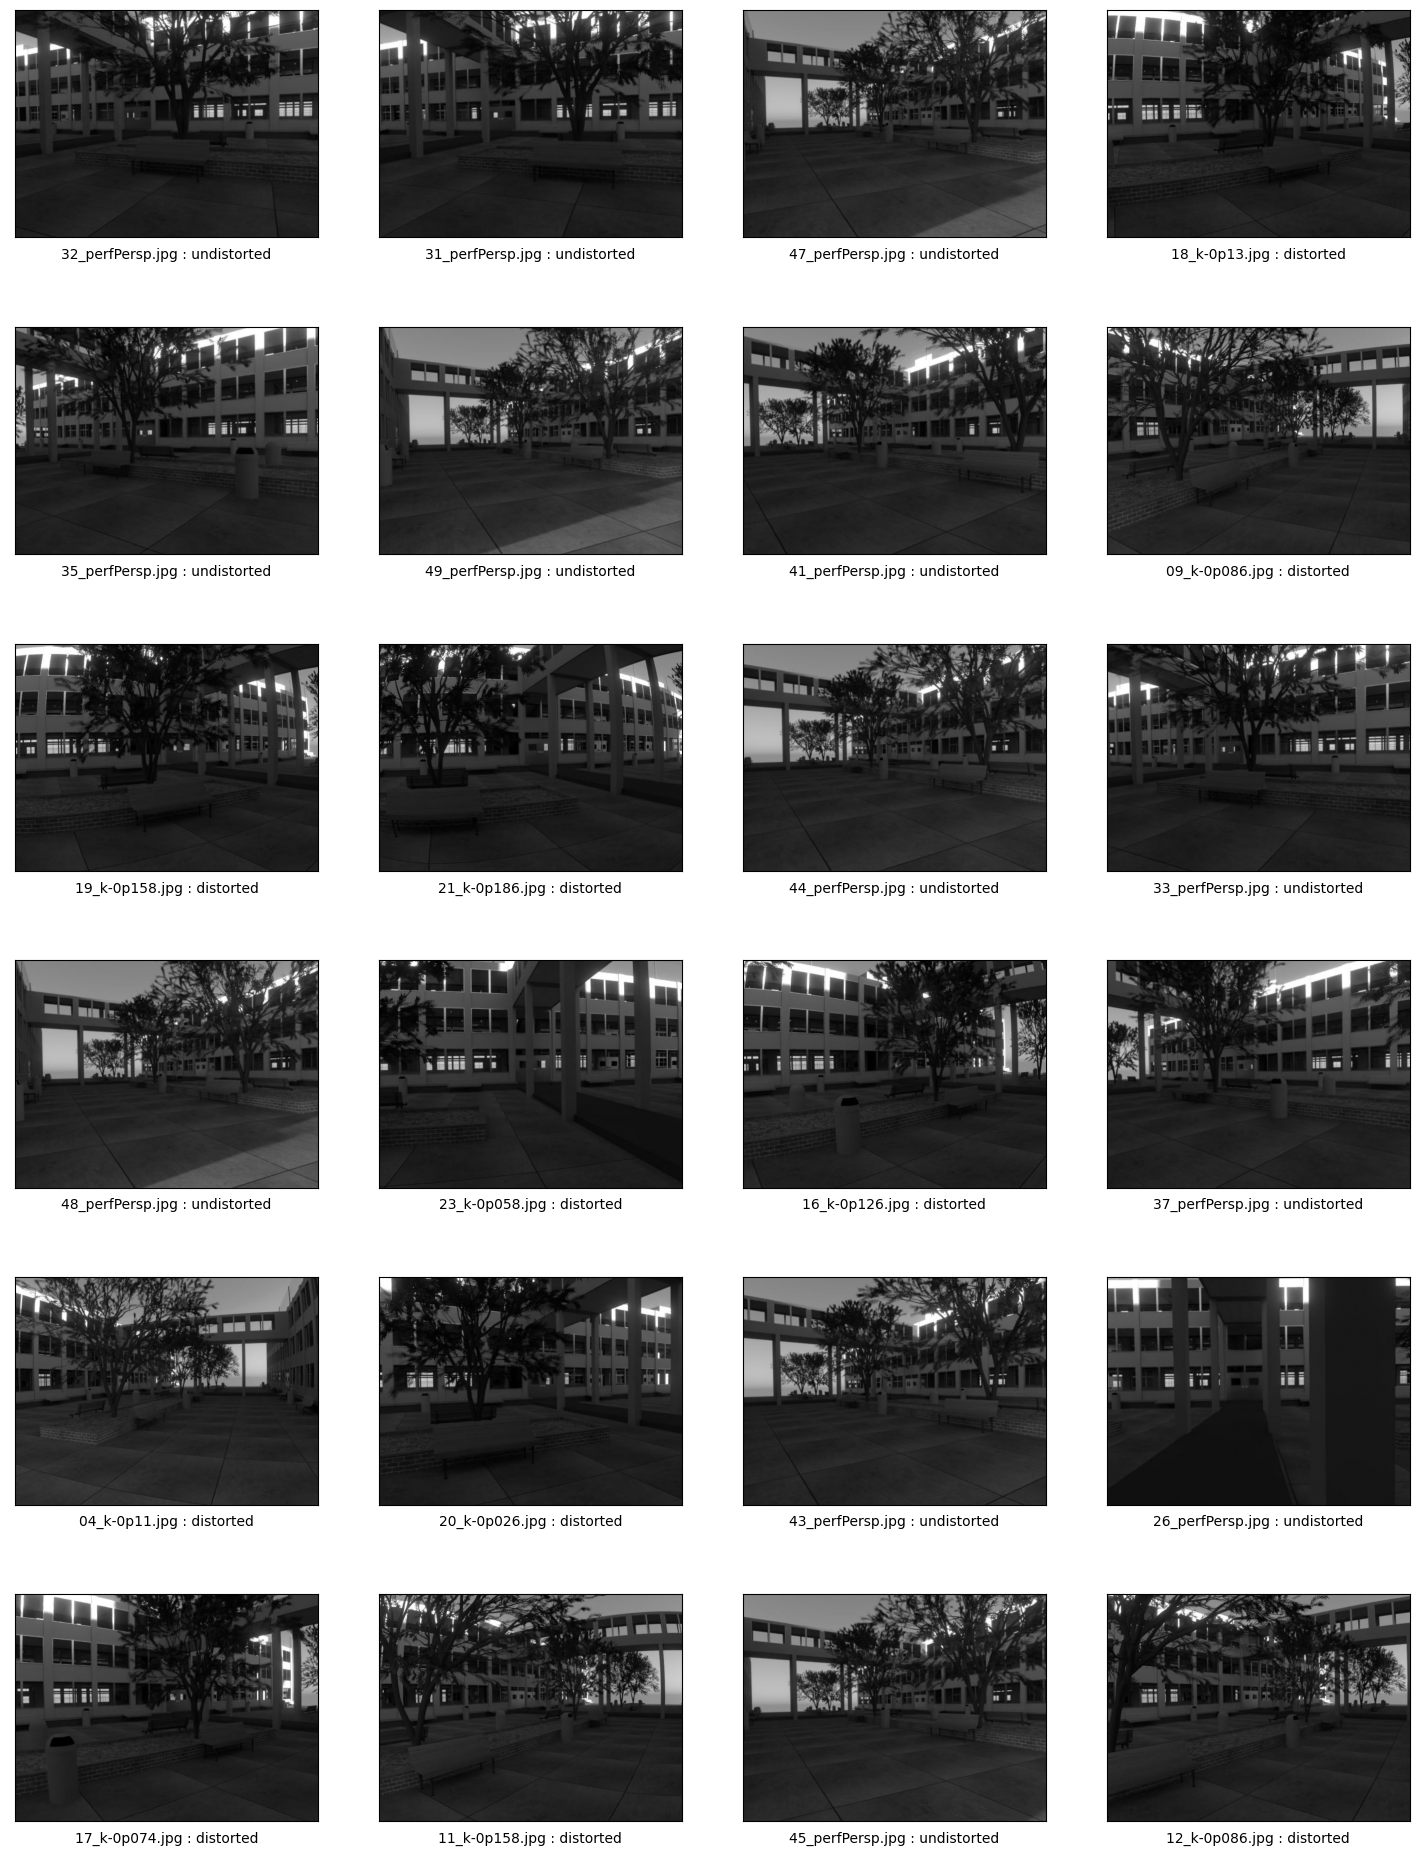

In [11]:
class_names = ['undistorted', 'distorted']

plt.figure(figsize=(18,24))
for k1 in range(0,24):
    plt.subplot(6,4,k1+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[k1])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(f"{filenames[idx_train[k1]]} : {class_names[train_labels[k1,0]]}")
plt.show()


### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.


In [12]:
model_01 = models.Sequential()
model_01.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(480, 640, 3)))
model_01.add(layers.MaxPooling2D((2, 2)))
model_01.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_01.add(layers.MaxPooling2D((2, 2)))
model_01.add(layers.Conv2D(64, (3, 3), activation='relu'))

model_01.add(layers.Flatten())
model_01.add(layers.Dense(64, activation='relu'))
model_01.add(layers.Dense(2))
# model_01.add(layers.Dense(1, activation='sigmoid'))

model_01.summary()

2022-11-30 23:22:09.572921: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 478, 638, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 239, 319, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 237, 317, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 118, 158, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 116, 156, 64)      36928     
                                                                 
 flatten (Flatten)           (None, 1158144)           0

In [13]:

# compile model
model_01.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# train model
history = model_01.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
2/2 [==============================] - 5s 1s/step - loss: 0.5589 - accuracy: 0.6250 - val_loss: 11.7230 - val_accuracy: 0.6000
Epoch 2/10
2/2 [==============================] - 4s 1s/step - loss: 9.5170 - accuracy: 0.5500 - val_loss: 11.7401 - val_accuracy: 0.4000
Epoch 3/10
2/2 [==============================] - 5s 1s/step - loss: 7.0441 - accuracy: 0.6000 - val_loss: 7.4827 - val_accuracy: 0.6000
Epoch 4/10
2/2 [==============================] - 4s 1s/step - loss: 5.4426 - accuracy: 0.5750 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 4s 1s/step - loss: 0.0231 - accuracy: 1.0000 - val_loss: 1.6158 - val_accuracy: 0.4000
Epoch 6/10
2/2 [==============================] - 4s 1s/step - loss: 0.3708 - accuracy: 0.8250 - val_loss: 0.1510 - val_accuracy: 0.9000
Epoch 7/10
2/2 [==============================] - 4s 1s/step - loss: 0.2441 - accuracy: 0.9500 - val_loss: 0.1629 - val_accuracy: 0.9000
Epoch 8/10
2/2 [=======================

### Evaluate the model

In [16]:
# dir(history.history)

1/1 - 0s - loss: 0.1347 - accuracy: 0.9000 - 313ms/epoch - 313ms/step


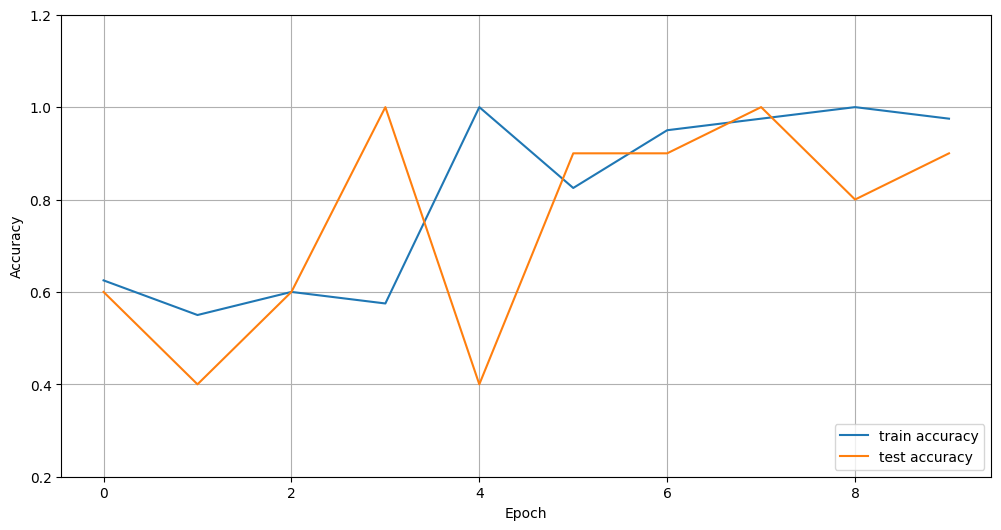

In [18]:
#

fig1 = plt.figure(figsize=(12,6))
# plt.plot(history.epoch,0.6*np.ones(len(history.epoch)),'k--')
# plt.plot(history.epoch,0.7*np.ones(len(history.epoch)),'k--')
# plt.plot(history.epoch,0.8*np.ones(len(history.epoch)),'k--')
# plt.plot(history.epoch,0.9*np.ones(len(history.epoch)),'k--')
# plt.plot(history.epoch,1.0*np.ones(len(history.epoch)),'k--')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label = 'test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1.2])
plt.grid()
plt.legend(loc='lower right')

test_loss, test_acc = model_01.evaluate(test_images, test_labels, verbose=2)


In [ ]:
print(test_acc)

Your simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code! For another CNN style, check out the [TensorFlow 2 quickstart for experts](https://www.tensorflow.org/tutorials/quickstart/advanced) example that uses the Keras subclassing API and `tf.GradientTape`.

In [19]:
# dir(history.history)

In [20]:
# train_images

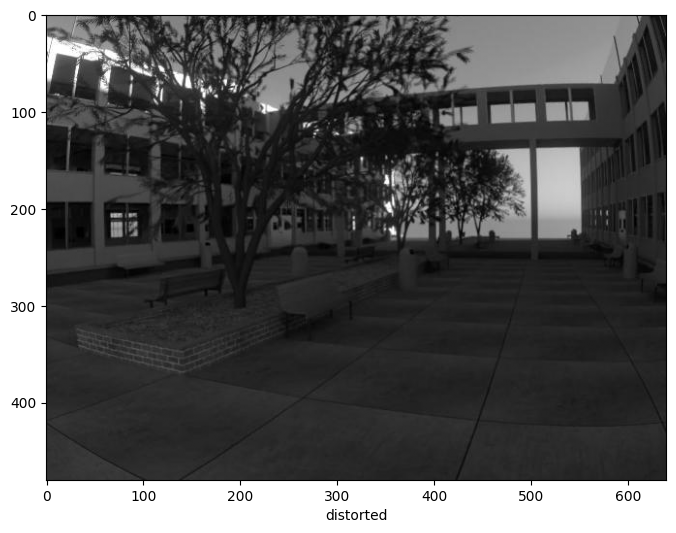

In [21]:
k1 = 1

fig1 = plt.figure(figsize=(8,8))
plt.imshow(test_images[k1])
plt.xlabel(class_names[test_labels[k1,0]])
plt.show()

In [22]:
model_01.predict(test_images)

# model.predict(train_images)

# print(test_labels)

1/1 [==============================] - 0s 280ms/step


array([[ 8.881665  , -1.0476432 ],
       [-7.202629  , 15.349894  ],
       [-6.864544  , 15.596459  ],
       [ 8.4733925 , -0.93134415],
       [ 5.8368244 , -0.0351569 ],
       [ 1.738617  ,  2.03375   ],
       [-2.544684  ,  6.445348  ],
       [-6.800775  , 15.014129  ],
       [ 2.1319103 ,  1.6782933 ],
       [ 8.004886  , -0.6112022 ]], dtype=float32)

In [23]:
# test_images[0].reshape(1,32,32,3).shape

In [24]:
kim = 1

print(model_01.predict(test_images[kim].reshape(1,480,640,3))[0])

print(np.argmax(model_01.predict(test_images[kim].reshape(1,480,640,3))))

print(class_names[np.argmax(model_01.predict(test_images[kim].reshape(1,480,640,3)))])

print(class_names[test_labels[k1,0]])

1/1 [==============================] - 0s 57ms/step
[-7.2026315 15.349911 ]
1/1 [==============================] - 0s 54ms/step
1
1/1 [==============================] - 0s 56ms/step
distorted
distorted


In [25]:
# Validate model accuracy

# model prediction from test_images
prediction = model_01.predict(test_images)
print(prediction)

# apply classification using argmax to 0 or 1
predicted_class = np.argmax(prediction, axis=1)

print("Predicted classes for test images:")
print(predicted_class)

print("Test image labels:")
print(test_labels[:,0].T)

print(f"Number of correct predictions out of number of test images: {np.sum(predicted_class == test_labels[:,0])} / {len(test_labels)}")
# np.sum(predicted_class == test_labels)

print(f"Model accuracy on test images: {np.sum(predicted_class == test_labels[:,0]) / len(test_labels)}")

1/1 [==============================] - 0s 263ms/step
[[ 8.881665   -1.0476432 ]
 [-7.202629   15.349894  ]
 [-6.864544   15.596459  ]
 [ 8.4733925  -0.93134415]
 [ 5.8368244  -0.0351569 ]
 [ 1.738617    2.03375   ]
 [-2.544684    6.445348  ]
 [-6.800775   15.014129  ]
 [ 2.1319103   1.6782933 ]
 [ 8.004886   -0.6112022 ]]
Predicted classes for test images:
[0 1 1 0 0 1 1 1 0 0]
Test image labels:
[0 1 1 0 0 0 1 1 0 0]
Number of correct predictions out of number of test images: 9 / 10
Model accuracy on test images: 0.9


In [ ]:
# np.argmax(model.predict(test_images),axis=1)

# test_labels.reshape(-1,)

# np.argmax(model.predict(test_images),axis=1)


# test_labels.reshape(-1,) == np.argmax(model.predict(test_images),axis=1)

# sum(test_labels.reshape(-1,) == np.argmax(model.predict(test_images),axis=1))

# sum(test_labels.reshape(-1,) == np.argmax(model.predict(test_images),axis=1)) / test_labels.shape[0]

In [27]:
model_02 = models.Sequential()
model_02.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(480, 640, 3)))
model_02.add(layers.MaxPooling2D((2, 2)))
model_02.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_02.add(layers.MaxPooling2D((2, 2)))
model_02.add(layers.Conv2D(64, (3, 3), activation='relu'))

model_02.add(layers.Flatten())
model_02.add(layers.Dense(64, activation='relu'))
# model_02.add(layers.Dense(2))
model_02.add(layers.Dense(1, activation='sigmoid'))

model_02.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 478, 638, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 239, 319, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 237, 317, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 118, 158, 64)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 116, 156, 64)      36928     
                                                                 
 flatten_2 (Flatten)         (None, 1158144)          

In [28]:

# compile model
model_02.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=['accuracy'])

# train model
history = model_02.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
2/2 [==============================] - 4s 1s/step - loss: 0.9332 - accuracy: 0.4500 - val_loss: 9.5234 - val_accuracy: 0.6000
Epoch 2/10
2/2 [==============================] - 4s 1s/step - loss: 9.2031 - accuracy: 0.4750 - val_loss: 2.5430 - val_accuracy: 0.4000
Epoch 3/10
2/2 [==============================] - 3s 1s/step - loss: 1.4277 - accuracy: 0.5250 - val_loss: 0.4864 - val_accuracy: 0.6000
Epoch 4/10
2/2 [==============================] - 4s 1s/step - loss: 0.2676 - accuracy: 0.9250 - val_loss: 0.0856 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 4s 1s/step - loss: 0.1883 - accuracy: 0.9000 - val_loss: 0.0544 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 4s 1s/step - loss: 0.0644 - accuracy: 0.9750 - val_loss: 0.4860 - val_accuracy: 0.9000
Epoch 7/10
2/2 [==============================] - 4s 1s/step - loss: 0.1065 - accuracy: 0.9750 - val_loss: 0.0326 - val_accuracy: 1.0000
Epoch 8/10
2/2 [=========================

In [29]:
model_02.predict(test_images)

# model.predict(train_images)

# print(test_labels)

1/1 [==============================] - 0s 334ms/step


array([[1.4566757e-05],
       [9.9979961e-01],
       [9.9959874e-01],
       [5.2621413e-06],
       [1.1087582e-04],
       [8.8327267e-04],
       [6.6011488e-01],
       [9.9939066e-01],
       [9.1582269e-04],
       [5.2422961e-06]], dtype=float32)

In [33]:
kim = 1

print(model_02.predict(test_images[kim].reshape(1,480,640,3))[0])

print((model_02.predict(test_images[kim].reshape(1,480,640,3))) >= 0.5)

print(class_names[np.argmax(model_01.predict(test_images[kim].reshape(1,480,640,3)))])

print(class_names[test_labels[k1,0]])

1/1 [==============================] - 0s 60ms/step
[0.9997996]
1/1 [==============================] - 0s 56ms/step
[[ True]]
1/1 [==============================] - 0s 60ms/step
distorted
distorted


In [43]:
# Validate model accuracy

# model prediction from test_images
prediction = model_02.predict(test_images)
print("Model prediction for test images:")
print(prediction[:,0].T)

# apply classification using argmax to 0 or 1
# print("Model prediction for test images, applying sigmoid classification:")
predicted_class = np.array(prediction >= 0.5, dtype=int)

print("Predicted classes for test images:")
print(predicted_class[:,0].T)

print("Test image labels:")
print(test_labels[:,0].T)

print(f"Number of correct predictions out of number of test images: {np.sum(predicted_class[:,0] == test_labels[:,0])} / {len(test_labels)}")
# np.sum(predicted_class == test_labels)

print(f"Model accuracy on test images: {np.sum(predicted_class[:,0] == test_labels[:,0]) / len(test_labels)}")

1/1 [==============================] - 0s 278ms/step
Model prediction for test images:
[1.4566757e-05 9.9979961e-01 9.9959874e-01 5.2621413e-06 1.1087582e-04
 8.8327267e-04 6.6011488e-01 9.9939066e-01 9.1582269e-04 5.2422961e-06]
Predicted classes for test images:
[0 1 1 0 0 0 1 1 0 0]
Test image labels:
[0 1 1 0 0 0 1 1 0 0]
Number of correct predictions out of number of test images: 10 / 10
Model accuracy on test images: 1.0
